<a href="https://colab.research.google.com/github/thiagosantos346/FinancesPy/blob/main/portifolioOptmization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description : This program attempts to optimize a users portifolio using the 
#              Efficiente Frontier

In [3]:
# Import The python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [109]:
# Get the stock symbols/ tickers in the portfolio
#FAANG
assets = ['SANB4.SA', 'BBSE3.SA', 'TAEE11.SA', 'ITSA4.SA', 'VALE3.SA']

In [110]:
# Assing weights to the stocks.
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [111]:
# Get the stock/portfolio stating date
stockStarteDate = '2013-01-01'

In [112]:
# Get the socks ending date (today)

today = '2020-10-17'
today

'2020-10-17'

In [113]:
# Create a dateframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# Store the adjusted close prionce of the stock into the dataframe

for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStarteDate, end = today)['Adj Close']

In [114]:
# Show de dataframe 

df

,SANB4.SA,BBSE3.SA,TAEE11.SA,ITSA4.SA,VALE3.SA
2013-01-02,4.916821,NaN,10.592811,3.973818,31.937414
2013-01-03,4.916821,NaN,10.763664,4.100598,31.394257
2013-01-04,4.916821,NaN,11.154184,4.080791,30.909048
2013-01-07,4.916821,NaN,11.422666,4.029286,30.300709
2013-01-08,4.916821,NaN,11.222526,4.057022,30.061718
...,...,...,...,...,...
2020-10-09,16.889999,24.200001,28.000000,9.360000,61.599998
2020-10-13,16.990000,24.540001,27.980000,9.320000,62.139999
2020-10-14,17.120001,24.730000,28.059999,9.290000,63.000000
2020-10-15,16.900000,24.790001,28.010000,9.250000,62.470001


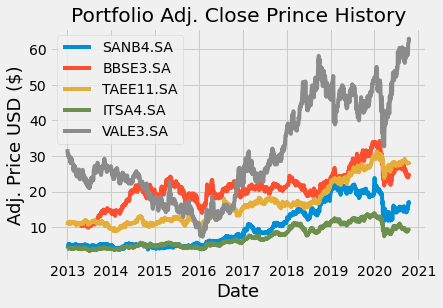

In [115]:
# Visually show the stock / portifolio
title = 'Portfolio Adj. Close Prince History'

# Get The stock
my_stocks = df

# Create and plt the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize= 18)
plt.legend(my_stocks.columns.values, loc=  'upper left')

In [116]:
#Show the daily simple return
returns = df.pct_change()
returns

,SANB4.SA,BBSE3.SA,TAEE11.SA,ITSA4.SA,VALE3.SA
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.000000,NaN,0.016129,0.031904,-0.017007
2013-01-04,0.000000,NaN,0.036281,-0.004830,-0.015455
2013-01-07,0.000000,NaN,0.024070,-0.012621,-0.019682
2013-01-08,0.000000,NaN,-0.017521,0.006884,-0.007887
...,...,...,...,...,...
2020-10-09,0.026748,-0.012245,-0.004267,0.003215,0.005058
2020-10-13,0.005921,0.014050,-0.000714,-0.004274,0.008766
2020-10-14,0.007652,0.007742,0.002859,-0.003219,0.013840
2020-10-15,-0.012851,0.002426,-0.001782,-0.004306,-0.008413


In [117]:
# Create and show the annulized covarience matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,SANB4.SA,BBSE3.SA,TAEE11.SA,ITSA4.SA,VALE3.SA
SANB4.SA,0.283554,0.045582,0.026082,0.065387,0.052815
BBSE3.SA,0.045582,0.100460,0.025385,0.060294,0.039803
TAEE11.SA,0.026082,0.025385,0.062279,0.027947,0.022673
ITSA4.SA,0.065387,0.060294,0.027947,0.098751,0.051430
VALE3.SA,0.052815,0.039803,0.022673,0.051430,0.216614


In [118]:
# Calculate the portfolio varience 
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06385826300257438

In [119]:
# Calculare the portfolio volatily aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.2527019252055164

In [120]:
# Calculare the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.19678522719258973

In [121]:
# Show the expected annual return, volatilily (risk), and variance

percent_var = str(round(port_variance, 2) * 100 ) + '%'
percent_voVls = str(round(port_volatility, 2) * 100) + '%'
percente_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return            : '+ percente_ret)
print('Expected annual volatility (rick) : '+ percent_vols)
print('Expected annual variance          : '+ percent_var)

Expected annual return            : 20.0%
Expected annual volatility (rick) : 28.999999999999996%
Expected annual variance          : 6.0%


In [122]:
!pip install PyPortfolioOpt

In [123]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models 
from pypfopt import expected_returns 

In [124]:
# Porfolio Optimization ! 
# Calculate the expected returns and the anualised sample covarince matrix of 
# assets returns

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
new_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('SANB4.SA', 0.12129), ('BBSE3.SA', 0.25351), ('TAEE11.SA', 0.62519), ('ITSA4.SA', 0.0), ('VALE3.SA', 0.0)])
Expected annual return: 14.0%
Annual volatility: 22.3%
Sharpe Ratio: 0.54


(0.1397456772002735, 0.22310749536733562, 0.5367174106056727)

In [125]:
0.12129 + 0.25351 + 0.62519

0.99999

In [129]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
new_cleaned_weights = cleaned_weights
da = DiscreteAllocation(new_cleaned_weights, latest_prices, total_portfolio_value = 1000 )

allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))


Discrete allocation:  {'SANB4.SA': 7, 'BBSE3.SA': 10, 'TAEE11.SA': 22}
Funds remaining: $16.28
